In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import dates, colors
from sunpy.time import TimeRange
from astropy.time import Time

import warnings
warnings.filterwarnings("ignore")

## Read in the flare lists

These are created in `flare_list_analysis.ipynb`

In [108]:
stix_flares = pd.read_csv("stix_flares_c_with_loc.csv")
fermi_flares = pd.read_csv("fermi_flares_20210101_20220601.csv")
goes_flares = pd.read_csv("goes_hek_flares_20210101_20220601.csv")

In [109]:
fermi_flares.head()

,flare,date,dur,peak counts,total_counts,sun_det0,sun_det1,sun_det2,sun_det3,t_start,t_peak,t_end,unique_month
0,210115_2358,15-Jan-2021,106,555,12977,n5,n3,n1,n4,2021-01-15 23:58:34,2021-01-15 00:00:12,2021-01-15 00:00:21,2021-01
1,210116_2358,16-Jan-2021,106,543,13410,n1,n3,n0,n5,2021-01-16 23:58:32,2021-01-16 23:59:50,2021-01-16 00:00:18,2021-01
2,210117_2358,17-Jan-2021,106,811,20519,n5,n3,n1,n0,2021-01-17 23:58:34,2021-01-17 23:58:38,2021-01-17 00:00:20,2021-01
3,210124_2358,24-Jan-2021,106,789,19915,n3,n1,n0,n5,2021-01-24 23:58:33,2021-01-24 23:58:41,2021-01-24 00:00:20,2021-01
4,210130_2358,30-Jan-2021,106,358,7914,n5,n4,n2,n3,2021-01-30 23:58:33,2021-01-30 00:00:20,2021-01-30 00:00:20,2021-01


In [110]:
stix_flares.head(2)

,start_UTC,peak_UTC,end_UTC,duration,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,GOES_class,LC0_peak_counts_4sec,lon,rad
0,2021-03-02 23:58:03.152,2021-03-02T23:59:23.152,2021-03-03T00:01:23.152,200,0.000001,-2000.0,-2000.0,C1.3,12799,-127.980800,8.444487e+07
1,2021-03-09 12:22:03.313,2021-03-09T12:31:35.314,2021-03-09T12:36:07.315,844,0.000002,-2000.0,-2000.0,C1.7,4351,-119.367484,9.056191e+07


In [111]:
stix_flares[stix_flares["start_UTC"]>="2021-11-01"]#.iloc[1]["peak_UTC"]

,start_UTC,peak_UTC,end_UTC,duration,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,GOES_class,LC0_peak_counts_4sec,lon,rad
233,2021-11-01 01:08:08.047,2021-11-01T01:10:04.047,2021-11-01T01:16:12.048,484,0.000002,NaN,NaN,C1.9,2175,-1.726097,1.236525e+08
234,2021-11-01 01:19:20.048,2021-11-01T01:20:20.048,2021-11-01T01:21:16.048,116,0.000002,NaN,NaN,C2.1,1855,-1.723890,1.236602e+08
235,2021-11-01 01:26:04.049,2021-11-01T01:37:12.050,2021-11-01T02:03:20.053,2236,0.000016,0.0,0.0,M1.6,63487,-1.722564,1.236649e+08
236,2021-11-01 03:26:20.065,2021-11-01T03:28:08.066,2021-11-01T03:30:36.066,256,0.000001,170.0,0.0,C1.3,991,-1.698954,1.237477e+08
237,2021-11-01 17:33:10.747,2021-11-01T17:50:26.749,2021-11-01T18:39:38.754,3988,0.000001,1080.0,-350.0,C1.3,991,-1.536810,1.243301e+08
...,...,...,...,...,...,...,...,...,...,...,...
2050,2022-05-27 11:51:28.300,2022-05-27T11:56:44.300,2022-05-27T12:09:28.302,1080,0.000002,NaN,NaN,C1.7,1471,164.860838,1.355810e+08
2051,2022-05-27 15:40:16.323,2022-05-27T15:40:56.323,2022-05-27T15:42:32.323,136,0.000001,NaN,NaN,C1.4,335,164.842522,1.357197e+08
2052,2022-05-27 16:29:12.328,2022-05-27T16:29:52.328,2022-05-27T16:30:32.328,80,0.000001,NaN,NaN,C1.0,399,164.838571,1.357493e+08
2053,2022-05-27 19:16:48.346,2022-05-27T19:22:56.346,2022-05-27T19:31:48.347,900,0.000001,NaN,NaN,C1.5,543,164.824946,1.358504e+08


In [112]:
t_fermi = fermi_flares[fermi_flares["t_start"]>="2021-11-01"].iloc[0]["t_peak"]

In [113]:
np.abs(Time(tstix).datetime - Time(t_fermi).datetime).total_seconds()<=10*60

True

In [114]:
fermi_flares.head(2)

,flare,date,dur,peak counts,total_counts,sun_det0,sun_det1,sun_det2,sun_det3,t_start,t_peak,t_end,unique_month
0,210115_2358,15-Jan-2021,106,555,12977,n5,n3,n1,n4,2021-01-15 23:58:34,2021-01-15 00:00:12,2021-01-15 00:00:21,2021-01
1,210116_2358,16-Jan-2021,106,543,13410,n1,n3,n0,n5,2021-01-16 23:58:32,2021-01-16 23:59:50,2021-01-16 00:00:18,2021-01


In [115]:
print(len(stix_flares))
print(len(fermi_flares))

2055
502


In [116]:
stix_timeranges = [TimeRange(stix_flares["start_UTC"].values[i], stix_flares["end_UTC"].values[i]) for i in range(len(stix_flares))]

In [117]:
fermi_flares["t_peak"].values[0:10]

array(['2021-01-15 00:00:12', '2021-01-16 23:59:50',
       '2021-01-17 23:58:38', '2021-01-24 23:58:41',
       '2021-01-30 00:00:20', '2021-02-07 00:00:04',
       '2021-02-08 23:59:24', '2021-02-26 00:00:22',
       '2021-02-27 23:58:50', '2021-04-16 22:19:40'], dtype=object)

In [118]:
fermi_flare_compare = []
for i in range(len(stix_flares)):
    dt = np.min(np.abs(pd.to_datetime(fermi_flares["t_peak"].values) - \
                       pd.to_datetime(stix_flares["peak_UTC"][i]))) 
    if dt.total_seconds() <= 10*60:
        #print(i, dt.total_seconds())
        fermi_ind = np.argmin(np.abs(pd.to_datetime(fermi_flares["t_peak"].values) - \
                       pd.to_datetime(stix_flares["peak_UTC"][i]))) 
        fermi_flare_compare.append(fermi_ind)
    else:
        #print(i, "no Fermi flare")
        fermi_flare_compare.append("no flare")

In [119]:
fermi_flare_compare[234]

104

In [120]:
stix_flares["fermi"] = fermi_flare_compare

In [121]:
potential_flares = stix_flares[~stix_flares["fermi"].isin(["no flare"])]

In [122]:
potential_flares[potential_flares["start_UTC"]>="2021-11-01"].head(2)

,start_UTC,peak_UTC,end_UTC,duration,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,GOES_class,LC0_peak_counts_4sec,lon,rad,fermi
234,2021-11-01 01:19:20.048,2021-11-01T01:20:20.048,2021-11-01T01:21:16.048,116,0.000002,NaN,NaN,C2.1,1855,-1.723890,1.236602e+08,104
235,2021-11-01 01:26:04.049,2021-11-01T01:37:12.050,2021-11-01T02:03:20.053,2236,0.000016,0.0,0.0,M1.6,63487,-1.722564,1.236649e+08,104


In [123]:
fermi_flares.iloc[potential_flares.iloc[0]["fermi"]]

flare                   210507_1858
date                     7-May-2021
dur                            2211
peak counts                   71659
total_counts               17656436
sun_det0                         n5
sun_det1                         n3
sun_det2                         n1
sun_det3                         n4
t_start         2021-05-07 18:58:45
t_peak          2021-05-07 18:59:34
t_end           2021-05-07 19:35:36
unique_month                2021-05
Name: 15, dtype: object

In [124]:
len(potential_flares)

270

In [125]:
fermi_info_flares = fermi_flares.iloc[potential_flares["fermi"].values][["t_start", "t_peak", "t_end", "peak counts", "total_counts", "sun_det0", "sun_det1", "sun_det2", "sun_det3"]]

In [126]:
fermi_info_flares.head(2)

,t_start,t_peak,t_end,peak counts,total_counts,sun_det0,sun_det1,sun_det2,sun_det3
15,2021-05-07 18:58:45,2021-05-07 18:59:34,2021-05-07 19:35:36,71659,17656436,n5,n3,n1,n4
16,2021-05-08 12:51:09,2021-05-08 12:51:17,2021-05-08 12:57:34,1381,75297,n3,n1,n0,n5


In [127]:
potential_flares["fermi_tstart"] = fermi_info_flares["t_start"].values
potential_flares["fermi_tpeak"] = fermi_info_flares["t_peak"].values
potential_flares["fermi_tend"] = fermi_info_flares["t_end"].values
potential_flares["fermi_peak_counts"] = fermi_info_flares["peak counts"].values
potential_flares["fermi_total_counts"] = fermi_info_flares["total_counts"].values
potential_flares["sun_det0"] = fermi_info_flares["sun_det0"].values
potential_flares["sun_det1"] = fermi_info_flares["sun_det1"].values
potential_flares["sun_det2"] = fermi_info_flares["sun_det2"].values
potential_flares["sun_det3"] = fermi_info_flares["sun_det3"].values

In [128]:
potential_flares.head(3)

,start_UTC,peak_UTC,end_UTC,duration,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,GOES_class,LC0_peak_counts_4sec,lon,...,fermi,fermi_tstart,fermi_tpeak,fermi_tend,fermi_peak_counts,fermi_total_counts,sun_det0,sun_det1,sun_det2,sun_det3
4,2021-05-07 18:51:07.200,2021-05-07T19:00:15.200,2021-05-07T19:18:55.202,1668,0.000039,540.0,270.0,M3.9,311295,-97.426482,...,15,2021-05-07 18:58:45,2021-05-07 18:59:34,2021-05-07 19:35:36,71659,17656436,n5,n3,n1,n4
5,2021-05-08 12:43:31.207,2021-05-08T12:51:39.208,2021-05-08T13:09:03.210,1532,0.000002,740.0,280.0,C1.5,3455,-97.442364,...,16,2021-05-08 12:51:09,2021-05-08 12:51:17,2021-05-08 12:57:34,1381,75297,n3,n1,n0,n5
6,2021-05-08 18:29:51.242,2021-05-08T18:40:07.243,2021-05-08T18:55:59.245,1568,0.000009,790.0,280.0,C8.6,51199,-97.448053,...,17,2021-05-08 18:46:44,2021-05-08 18:47:09,2021-05-08 18:53:13,1003,49965,n5,n4,n2,n1


In [129]:
potential_flares["goes_class_ind"] = [x[0] for x in potential_flares["GOES_class"]]

In [130]:
potential_flares[potential_flares["goes_class_ind"].isin(["X", "M"])]

,start_UTC,peak_UTC,end_UTC,duration,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,GOES_class,LC0_peak_counts_4sec,lon,...,fermi_tstart,fermi_tpeak,fermi_tend,fermi_peak_counts,fermi_total_counts,sun_det0,sun_det1,sun_det2,sun_det3,goes_class_ind
4,2021-05-07 18:51:07.200,2021-05-07T19:00:15.200,2021-05-07T19:18:55.202,1668,0.000039,540.0,270.0,M3.9,311295,-97.426482,...,2021-05-07 18:58:45,2021-05-07 18:59:34,2021-05-07 19:35:36,71659,17656436,n5,n3,n1,n4,M
23,2021-05-22 21:31:50.988,2021-05-22T21:35:42.990,2021-05-22T21:41:34.991,584,0.000015,1050.0,320.0,M1.5,77823,-98.139954,...,2021-05-22 21:30:59,2021-05-22 21:31:46,2021-05-22 21:31:58,7568,153646,n5,n1,n3,n4,M
30,2021-05-23 11:03:19.070,2021-05-23T11:06:35.070,2021-05-23T11:13:47.071,628,0.000012,1040.0,320.0,M1.2,55295,-98.177657,...,2021-05-23 11:02:44,2021-05-23 11:05:04,2021-05-23 11:15:42,17718,3210323,n5,n4,n2,n1,M
76,2021-08-28 05:53:24.582,2021-08-28T06:04:24.583,2021-08-28T06:37:12.586,2628,0.000048,1070.0,-1220.0,M4.8,753663,-72.357369,...,2021-08-28 05:53:18,2021-08-28 06:06:22,2021-08-28 06:47:53,130560,62574028,n5,n1,n3,n0,M
113,2021-09-23 15:21:04.191,2021-09-23T15:24:44.191,2021-09-23T15:35:32.192,868,0.000019,940.0,-720.0,M1.9,344063,-33.046098,...,2021-09-23 15:28:39,2021-09-23 15:28:43,2021-09-23 15:35:04,41086,1590972,n3,n1,n0,n5,M
160,2021-10-26 02:44:51.577,2021-10-26T02:46:35.577,2021-10-26T02:51:07.578,376,0.000013,0.0,0.0,M1.3,172031,-3.798244,...,2021-10-26 02:43:37,2021-10-26 02:45:58,2021-10-26 02:54:12,57574,6421385,n5,n4,n1,n3,M
214,2021-10-28 10:27:27.418,2021-10-28T10:30:15.418,2021-10-28T10:36:23.419,536,0.000021,330.0,-640.0,M2.1,221183,-2.892091,...,2021-10-28 10:23:32,2021-10-28 10:25:18,2021-10-28 10:28:20,139572,14907042,n5,n4,n3,n1,M
226,2021-10-28 16:12:07.453,2021-10-28T17:36:11.461,2021-10-29T02:06:47.513,35680,0.000014,20.0,0.0,M1.4,1855,-2.805832,...,2021-10-28 17:36:10,2021-10-28 17:37:20,2021-10-28 17:41:01,5021,97208,n5,n1,n3,n4,M
235,2021-11-01 01:26:04.049,2021-11-01T01:37:12.050,2021-11-01T02:03:20.053,2236,0.000016,0.0,0.0,M1.6,63487,-1.722564,...,2021-11-01 01:23:41,2021-11-01 01:29:46,2021-11-01 01:43:45,8195,3203613,n5,n1,n3,n4,M
260,2021-11-09 16:37:31.714,2021-11-09T16:53:03.716,2021-11-09T17:30:11.720,3160,0.000020,0.0,0.0,M2.0,55295,0.004987,...,2021-11-09 16:33:26,2021-11-09 16:53:22,2021-11-09 17:32:17,3945,1471584,n5,n3,n1,n4,M


In [131]:
potential_flares.to_csv("stix_fermi_potential_flares_20210101_20220601_fixed.csv", index_label=False)

In [132]:
ls

GBM/
README.md
STIX/
combining_flare_lists.ipynb
creating_plots.ipynb
directivity_flares_overview.key*
fermi_flares_20210101_20220601.csv
fermi_gbm_flare_list.txt
fermi_stix_plots/
fermi_stix_plots_mx/
flare_list_analysis.ipynb
flares_of_interest/
goes_flares_20210101_20220718.csv
goes_hek_flares_20210101_20220601.csv
matplotlibrc
orbit_from_earth.png
orbit_from_earth_within5.png
orbit_from_earth_within90.png
solo_position_analysis.ipynb
stix_fermi_potential_flares_20210101_20220601.csv
stix_fermi_potential_flares_20210101_20220601_fixed.csv
stix_flares_20210101_20220601.csv
stix_flares_c_with_loc.csv
swpc_flare.py
swpc_flarelist_20100101-20220717_concat.csv
test.png


In [133]:
potential_flares

,start_UTC,peak_UTC,end_UTC,duration,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,GOES_class,LC0_peak_counts_4sec,lon,...,fermi_tstart,fermi_tpeak,fermi_tend,fermi_peak_counts,fermi_total_counts,sun_det0,sun_det1,sun_det2,sun_det3,goes_class_ind
4,2021-05-07 18:51:07.200,2021-05-07T19:00:15.200,2021-05-07T19:18:55.202,1668,0.000039,540.0,270.0,M3.9,311295,-97.426482,...,2021-05-07 18:58:45,2021-05-07 18:59:34,2021-05-07 19:35:36,71659,17656436,n5,n3,n1,n4,M
5,2021-05-08 12:43:31.207,2021-05-08T12:51:39.208,2021-05-08T13:09:03.210,1532,0.000002,740.0,280.0,C1.5,3455,-97.442364,...,2021-05-08 12:51:09,2021-05-08 12:51:17,2021-05-08 12:57:34,1381,75297,n3,n1,n0,n5,C
6,2021-05-08 18:29:51.242,2021-05-08T18:40:07.243,2021-05-08T18:55:59.245,1568,0.000009,790.0,280.0,C8.6,51199,-97.448053,...,2021-05-08 18:46:44,2021-05-08 18:47:09,2021-05-08 18:53:13,1003,49965,n5,n4,n2,n1,C
7,2021-05-09 04:32:15.303,2021-05-09T04:34:47.303,2021-05-09T04:38:51.303,396,0.000002,920.0,280.0,C1.7,6399,-97.458583,...,2021-05-09 04:34:02,2021-05-09 04:35:03,2021-05-09 04:36:54,2720,56128,n3,n1,n5,n0,C
8,2021-05-09 13:50:15.359,2021-05-09T13:55:11.360,2021-05-09T14:06:59.361,1004,0.000004,1010.0,280.0,C4.0,13823,-97.469042,...,2021-05-09 13:51:52,2021-05-09 13:54:22,2021-05-09 13:59:38,11728,944357,n5,n4,n2,n1,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028,2022-05-26 03:21:40.301,2022-05-26T03:33:36.302,2022-05-26T04:06:56.306,2716,0.000003,NaN,NaN,C3.5,5375,165.005938,...,2022-05-26 03:29:52,2022-05-26 03:31:42,2022-05-26 03:39:42,1943,142088,n3,n1,n5,n0,C
2029,2022-05-26 04:41:16.309,2022-05-26T04:42:40.309,2022-05-26T04:45:48.309,272,0.000001,NaN,NaN,C1.3,495,165.000409,...,2022-05-26 04:46:51,2022-05-26 04:47:54,2022-05-26 04:54:40,31794,2332928,n5,n1,n3,n4,C
2030,2022-05-26 04:48:12.310,2022-05-26T04:51:00.310,2022-05-26T04:56:44.310,512,0.000006,NaN,NaN,C6.4,671,164.999925,...,2022-05-26 04:46:51,2022-05-26 04:47:54,2022-05-26 04:54:40,31794,2332928,n5,n1,n3,n4,C
2040,2022-05-26 17:35:48.389,2022-05-26T17:45:16.390,2022-05-26T18:06:56.391,1868,0.000003,NaN,NaN,C2.9,2687,164.944832,...,2022-05-26 17:48:49,2022-05-26 17:50:48,2022-05-26 17:52:30,1307,41591,n1,n3,n0,n5,C


In [134]:
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient
from sunpy.timeseries import TimeSeries
from stixpy import timeseries

In [135]:
tstart, tend = potential_flares.iloc[0]["start_UTC"], potential_flares.iloc[0]["end_UTC"]

In [136]:
query = Fido.search(a.Time(tstart, tend), a.Instrument.stix,
                    a.stix.DataProduct.ql_lightcurve)

In [137]:
query2 =Fido.search(a.Time(tstart, tend), a.Instrument.gbm,
                    a.Resolution("cspec"), a.Detector("n5"))

In [138]:
gbm_files = Fido.fetch(query2)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [139]:
files = Fido.fetch(query)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [140]:
stix_lc = TimeSeries(files).truncate(tstart, tend)
gbm_lc = TimeSeries(gbm_files).truncate(potential_flares.iloc[0]["fermi_tstart"], 
                                        potential_flares.iloc[0]["fermi_tend"])

[[<matplotlib.lines.Line2D at 0x1259ecb50>],

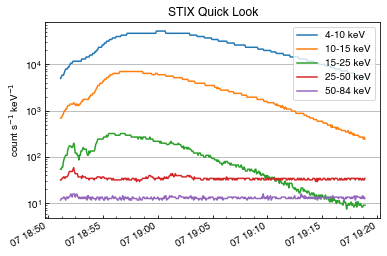

In [141]:
stix_lc.plot()

<AxesSubplot:xlabel='Start time: 2021-05-07 18:58:47 UT', ylabel='Counts/s/keV'>

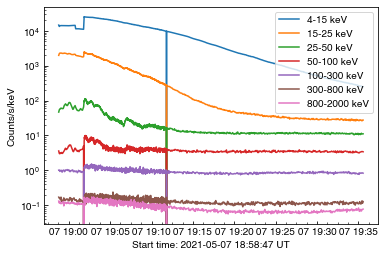

In [142]:
gbm_lc.plot()